In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize


In [2]:
#데이터 로드
data = load_iris()
X, y = data.data, data.target


In [3]:
# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 최적의 k값 찾기
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))


최적의 k 값: 1


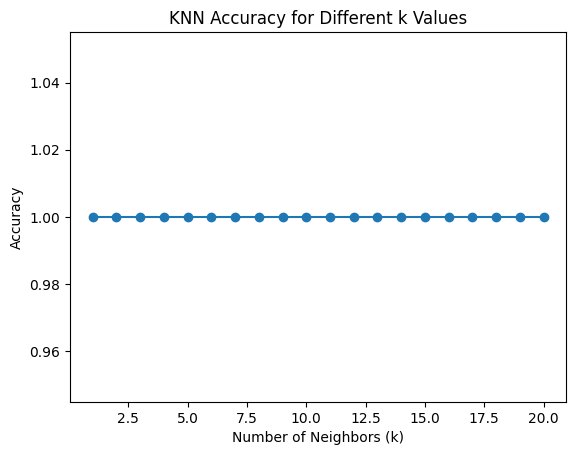

In [5]:
# 최적 k값 출력 및 시각화
optimal_k = k_values[np.argmax(accuracies)]
print(f'최적의 k 값: {optimal_k}')

plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different k Values')
plt.show()

In [6]:

# KNN 모델 생성 및 학습 (최적 k값 적용)
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

# 예측 및 정확도 평가
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN accuracy (k={optimal_k}): {accuracy:.2f}')

KNN accuracy (k=1): 1.00


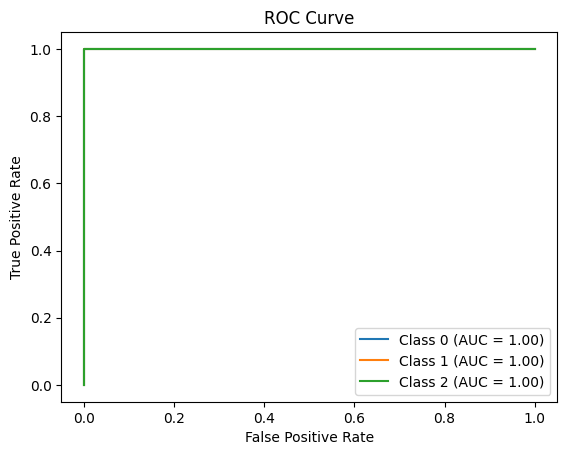

In [7]:
# ROC 및 AUC 계산
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = knn.predict_proba(X_test)

# 각 클래스별 ROC Curve 및 AUC 계산
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    auc = roc_auc_score(y_test_bin[:, i], y_score[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc:.2f})')

# 그래프 설정
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()